<a href="https://colab.research.google.com/github/jruheni/LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nyc = pd.read_csv("/content/ave_hi_nyc_jan_1895-2018.xls", header = "infer")

In [ ]:
nyc

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


In [ ]:
nyc.columns

Index(['Date', 'Value', 'Anomaly'], dtype='object')

In [ ]:
nyc.head(6)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0


In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


In [ ]:
nyc.Date=nyc.Date.floordiv(100)

In [ ]:
nyc.head()

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [ ]:
nyc["Date"].values

array([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Value.values, random_state=11)

In [ ]:
X_train.shape

(93, 1)

In [ ]:
X_test.shape

(31, 1)

In [8]:
linear_regression = LinearRegression()

In [13]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [14]:
linear_regression.coef_

array([0.00019392])

In [ ]:
linear_regression.intercept_

-0.30779820252656265

In [ ]:
predicted = linear_regression.predict(X_test)

In [ ]:
predicted

array([37.85501484, 36.47820604, 37.93258153, 36.61394775, 36.74968946,
       38.68885679, 36.43942269, 37.13752293, 37.62231476, 37.5253564 ,
       37.00178122, 38.320415  , 37.19569795, 38.45615671, 36.55577273,
       37.25387297, 38.18467329, 37.89379819, 38.14588994, 38.63068177,
       38.04893157, 37.02117289, 37.11813126, 37.69988146, 36.73029779,
       37.64170644, 37.56413974, 38.10710659, 36.8660395 , 36.84664783,
       36.9436062 ])

In [ ]:
expected = y_test
expected

array([31.7, 35.5, 40.5, 29.8, 40.7, 34.8, 34.2, 38.2, 36.2, 42.5, 39.4,
       40.9, 39.8, 40.8, 37. , 45.7, 33. , 29.9, 38. , 42.4, 32.3, 33.8,
       38.5, 37.8, 36.1, 33.8, 42.4, 30.6, 38.4, 42.3, 39.7])

In [ ]:
for p,e  in zip (predicted[::], expected[::]):
  print(f'PREDICTED: {p:.2f}, EXPECTED: {e:.2f}')

PREDICTED: 37.86, EXPECTED: 31.70
PREDICTED: 36.48, EXPECTED: 35.50
PREDICTED: 37.93, EXPECTED: 40.50
PREDICTED: 36.61, EXPECTED: 29.80
PREDICTED: 36.75, EXPECTED: 40.70
PREDICTED: 38.69, EXPECTED: 34.80
PREDICTED: 36.44, EXPECTED: 34.20
PREDICTED: 37.14, EXPECTED: 38.20
PREDICTED: 37.62, EXPECTED: 36.20
PREDICTED: 37.53, EXPECTED: 42.50
PREDICTED: 37.00, EXPECTED: 39.40
PREDICTED: 38.32, EXPECTED: 40.90
PREDICTED: 37.20, EXPECTED: 39.80
PREDICTED: 38.46, EXPECTED: 40.80
PREDICTED: 36.56, EXPECTED: 37.00
PREDICTED: 37.25, EXPECTED: 45.70
PREDICTED: 38.18, EXPECTED: 33.00
PREDICTED: 37.89, EXPECTED: 29.90
PREDICTED: 38.15, EXPECTED: 38.00
PREDICTED: 38.63, EXPECTED: 42.40
PREDICTED: 38.05, EXPECTED: 32.30
PREDICTED: 37.02, EXPECTED: 33.80
PREDICTED: 37.12, EXPECTED: 38.50
PREDICTED: 37.70, EXPECTED: 37.80
PREDICTED: 36.73, EXPECTED: 36.10
PREDICTED: 37.64, EXPECTED: 33.80
PREDICTED: 37.56, EXPECTED: 42.40
PREDICTED: 38.11, EXPECTED: 30.60
PREDICTED: 36.87, EXPECTED: 38.40
PREDICTED: 36.

In [6]:
predict = (lambda date: linear_regression.coef_ * date + linear_regression.intercept_)

In [ ]:
predict(2024)

array([38.94094855])

In [ ]:
#50% train, 50% test
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Value.values, test_size=0.5, random_state=11)

In [ ]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [ ]:
for p,e  in zip (predicted[::], expected[::]):
  print(f'PREDICTED: {p:.2f}, EXPECTED: {e:.2f}')

PREDICTED: 37.86, EXPECTED: 31.70
PREDICTED: 36.48, EXPECTED: 35.50
PREDICTED: 37.93, EXPECTED: 40.50
PREDICTED: 36.61, EXPECTED: 29.80
PREDICTED: 36.75, EXPECTED: 40.70
PREDICTED: 38.69, EXPECTED: 34.80
PREDICTED: 36.44, EXPECTED: 34.20
PREDICTED: 37.14, EXPECTED: 38.20
PREDICTED: 37.62, EXPECTED: 36.20
PREDICTED: 37.53, EXPECTED: 42.50
PREDICTED: 37.00, EXPECTED: 39.40
PREDICTED: 38.32, EXPECTED: 40.90
PREDICTED: 37.20, EXPECTED: 39.80
PREDICTED: 38.46, EXPECTED: 40.80
PREDICTED: 36.56, EXPECTED: 37.00
PREDICTED: 37.25, EXPECTED: 45.70
PREDICTED: 38.18, EXPECTED: 33.00
PREDICTED: 37.89, EXPECTED: 29.90
PREDICTED: 38.15, EXPECTED: 38.00
PREDICTED: 38.63, EXPECTED: 42.40
PREDICTED: 38.05, EXPECTED: 32.30
PREDICTED: 37.02, EXPECTED: 33.80
PREDICTED: 37.12, EXPECTED: 38.50
PREDICTED: 37.70, EXPECTED: 37.80
PREDICTED: 36.73, EXPECTED: 36.10
PREDICTED: 37.64, EXPECTED: 33.80
PREDICTED: 37.56, EXPECTED: 42.40
PREDICTED: 38.11, EXPECTED: 30.60
PREDICTED: 36.87, EXPECTED: 38.40
PREDICTED: 36.

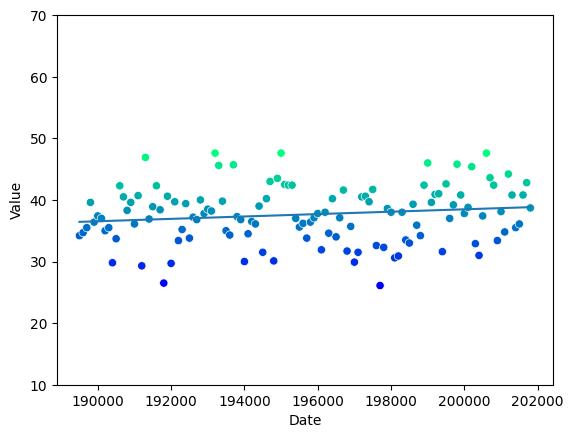

In [15]:
axes = sns.scatterplot(data=nyc, x="Date", y="Value", hue = 'Value', palette = 'winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x,y)